### Baseline TD3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20       |
|    ep_rew_mean     | -1.53    |
| time/              |          |
|    episodes        | 50       |
|    fps             | 73       |
|    time_elapsed    | 13       |
|    total_timesteps | 1000     |
| train/             |          |
|    actor_loss      | -2.41    |
|    critic_loss     | 0.00366  |
|    ent_coef        | 0.407    |
|    ent_coef_loss   | -1.5     |
|    learning_rate   | 0.001    |
|    n_updates       | 899      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20       |
|    ep_rew_mean     | -1.27    |
| time/              |          |
|    episodes        | 100      |
|    fps             | 68       |
| 

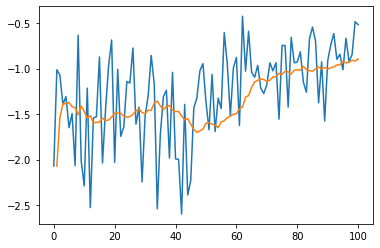

In [2]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import time
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import SAC
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
%load_ext autoreload
%autoreload 2

episode_n = 101

env = SimpleControlProblem(dt=0.1)

total_timesteps = episode_n * int(env.terminal_time / env.dt + 0.5)

model = SAC("MlpPolicy", env, verbose=1, 
            learning_rate=1e-3, batch_size=128, tau=1e-2, gamma=1)

start_time = time.time()
model.learn(total_timesteps=total_timesteps, log_interval=50)
print('time:', time.time() - start_time)

mean_total_rewards = [np.mean(env.total_rewards[max(0, i - 20): i]) 
                      for i in range(len(env.total_rewards))]

plt.plot(env.total_rewards)
plt.plot(mean_total_rewards)
print('best_total_reward:', max(env.total_rewards))

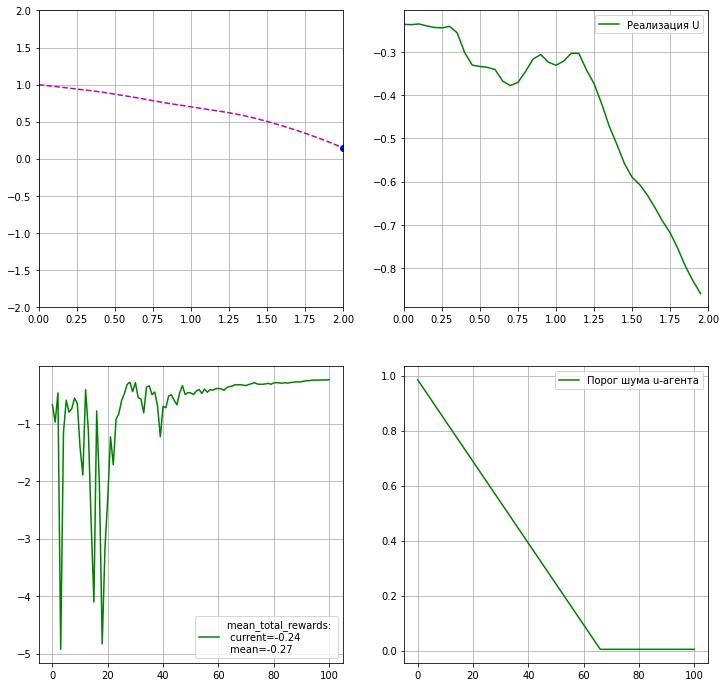

time: 45.60322165489197


In [23]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import torch.nn as nn
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
from Agents.TD3 import TD3
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.Noises import OUNoise
from Solvers import OneAgentSolver as solver 
%load_ext autoreload
%autoreload 2

#learning parameters
episode_n = 101

#environment initialization
env = SimpleControlProblem()

#agent initialization
q1_model = SequentialNetwork([env.state_dim + env.action_dim, 256, 128, 1])
q2_model = SequentialNetwork([env.state_dim + env.action_dim, 256, 128, 1])
pi_model = SequentialNetwork([env.state_dim, 256, 128, env.action_dim], output_activation=nn.Tanh())
noise = OUNoise(action_dim=env.action_dim, threshold_decrease=1.5/episode_n)
agent = TD3(env.action_min, env.action_max, q1_model, q2_model, pi_model, noise,
             q_model_lr=1e-3, pi_model_lr=1e-3, gamma=1, batch_size=256, tau=1e-2)

#learning
visualizer = SimpleControlProblemVisualizer(waiting_for_show=episode_n-1)
start_time = time.time()
solver.go(env, agent, episode_n=episode_n, show=visualizer.show)
print('time:', time.time() - start_time)

DDPG: 35s, -0.29
two Q-function: 45, -0.24